# SEABORN

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

Para ver todo lo que nos puede aportar el módulo `seaborn`, vamos a trabajar con una serie de datasets de este mismo módulo:

* `titanic`: Pasajeros del titanic
* `penguins`: Pingüinos
* `tips`: Propinas
* `flights`: Vuelos


In [54]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [56]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Scatter Plot

Para hacer un gráfico de nube de puntos, usamos el método `.scatterplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable que indica las posiciones de los puntos en el eje horizontal
* `y`: variable que indica las posiciones de los puntos en el eje vertical
* `sizes`: para indicar el tamaño de los puntos
* `size`: variable que divide las observaciones y produce puntos de diferentes tamaños
* `markers`: para indicar el tipo de punto
* `style`: variable que divide las observaciones y produce puntos de diferentes estilos
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce puntos de diferentes colores
* `color`: para modificar el color de todos los elementos

Vamos a usar el dataset `tips` donde vamos a representar las propinas, que se corresponde con la variable `tip`, en el eje de horizontal y el total pagado, variable `total_bill`, en el eje vertical.

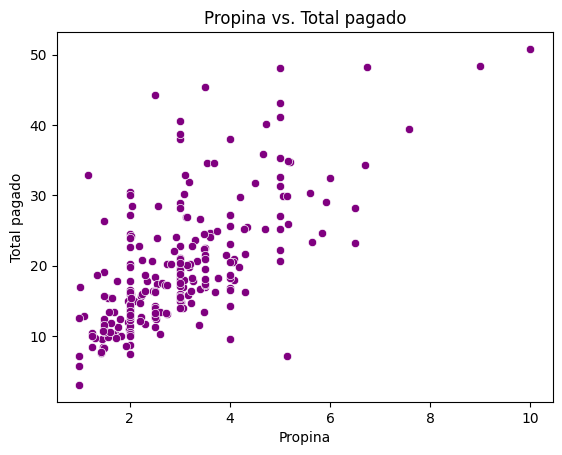

In [58]:
sns.scatterplot(data = tips, x = "tip", y = "total_bill", color = "purple")
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

**Observación.** Podríamos pintar los puntos en función de una variable categórica, como en este caso podría ser la variable `sex`, que se refiere al sexo de quien pagó tanto el total como la propina:

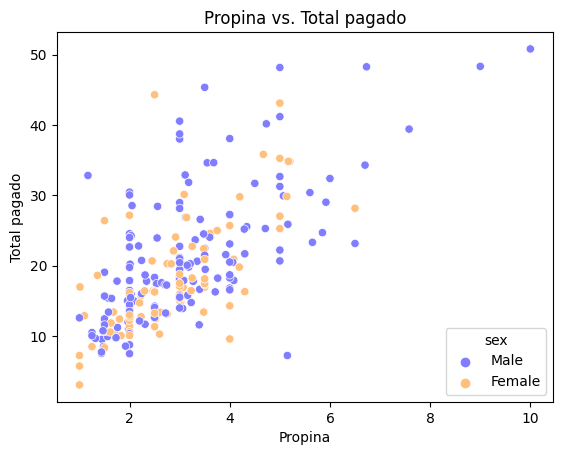

In [59]:
sns.scatterplot(data = tips, x = "tip", y = "total_bill", hue = "sex", palette = ["#817dff", "#ffc07d"])
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

**Observación.** También podríamos dibujar los puntos de diferente forma en función de una variable categórica, como en este caso podría ser la variable `sex`:

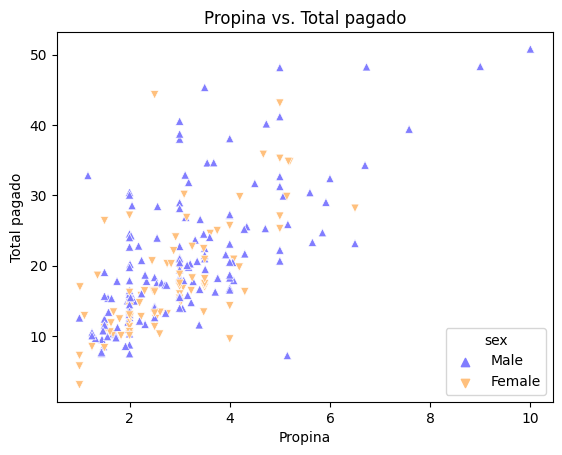

In [60]:
sns.scatterplot(data = tips, x = "tip", y = "total_bill",
                hue = "sex", palette = ["#817dff", "#ffc07d"],
                style = "sex", markers = ["^", "v"])
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

**Observación.** También podríamos dibujar los puntos de diferente tamaño en función de una variable categórica, como en este caso podría ser la variable `size`, que indica el número de comensales:



Primero nos aseguramos de cuántas categorías hay en la variable `size` del dataset `tips`:

In [61]:
tips["size"].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

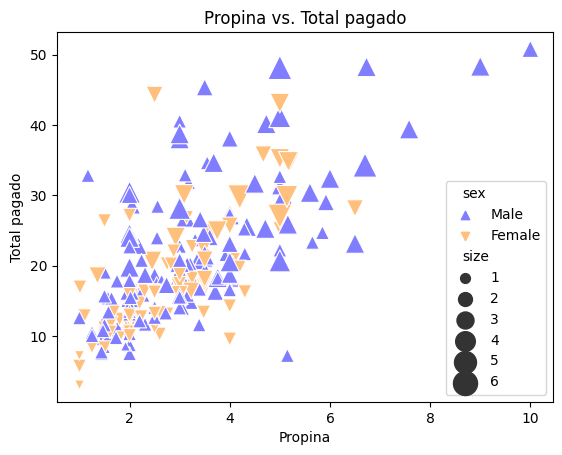

In [62]:
sns.scatterplot(data = tips, x = "tip", y = "total_bill",
                hue = "sex", palette = ["#817dff", "#ffc07d"],
                style = "sex", markers = ["^", "v"],
                size = "size", sizes = [50, 100, 150, 200, 250, 300])
plt.title("Propina vs. Total pagado")
plt.xlabel("Propina")
plt.ylabel("Total pagado")
plt.show()

GRAFICO DE DISPERSION


Datos de muestra

Los siguientes datos serán usandos en los ejemplos de este tutorial. Ten en cuenta que la función lmplot requiere un data frame de pandas como argumento mientras que regplot se puede utilizar sin establecer el argumento data.

In [22]:
import numpy as np
import pandas as pd
from random import choices

# Semilla
rng = np.random.RandomState(0)

# Simulación de datos
x = rng.uniform(0, 1, 300)
y = 5 * x + rng.normal(0, 2, size = 300)
grupo = choices(["A", "B"], k = 300)
x = x + rng.uniform(-0.2, 0.2, 300)

# Conjunto de datos
df = {'x': x, 'y': y, 'grupo': grupo}

# Data frame pandas
df = pd.DataFrame(data = df)

Recta de regresión con regplot

Para crear un gráfico de dispersión en seaborn con una recta de regresión pasa tus datos a la función regplot. Ten en cuenta que tanto las observaciones como las estimaciones tendrán por defecto el mismo color.


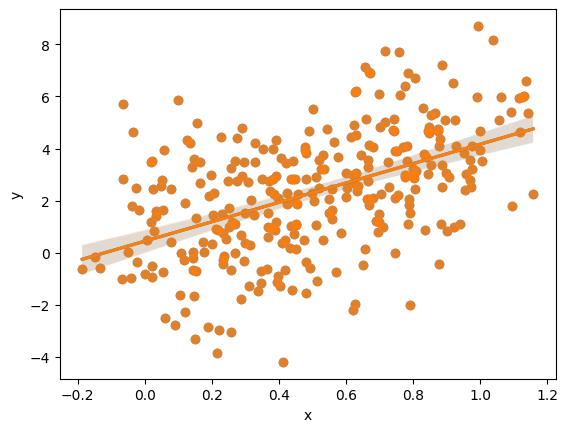

In [23]:
sns.regplot(x = x, y = y)

# Equivalente a:
sns.regplot(x = "x", y = "y", data = df)
plt.show()

Colores diferentes para puntos y estimaciones

Si necesitas modificar los colores por defecto de los puntos y de la recta de regresión y su intervalo de confianza tendrás que pasar diccionarios a los argumentos scatter_kws y line_kws, respectivamente, tal y como se muestra en el siguiente ejemplo.

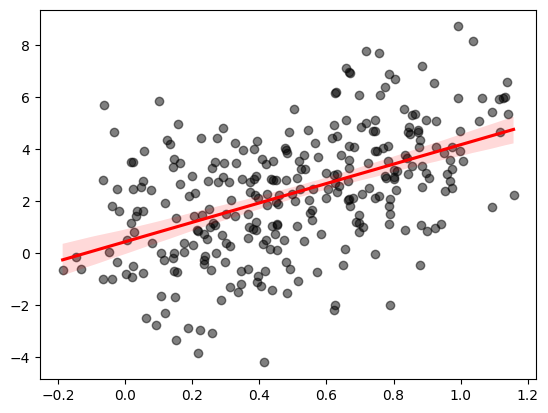

In [24]:
sns.regplot(x = x, y = y,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})
plt.show()

Nivel del intervalo de confianza

Por defecto, el intervalo de confianza se dibuja al 95%. Sin embargo, puedes usar el argumento ci para modificar el nivel o eliminar la estimación estableciendo el argumento como None.

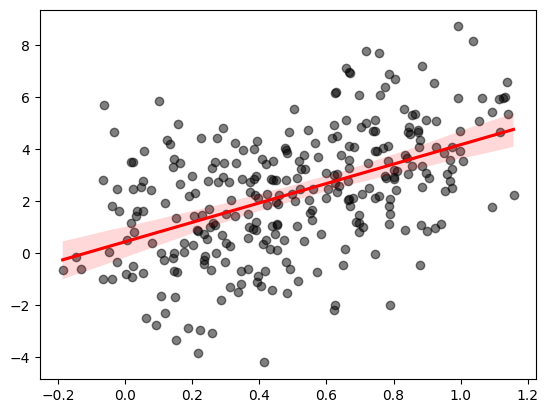

In [25]:
sns.regplot(x = x, y = y,
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99) # Intervalo al 99%
plt.show()

Rectas de regresión por grupos con lmplot


La función lmplot permite crear rectas de regresión basadas en una variable categórica. Tan solo tienes que pasar la variable al argumento hue de la función. Ten en cuenta que esta función requiere especificar el argumento data con un data frame como input.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


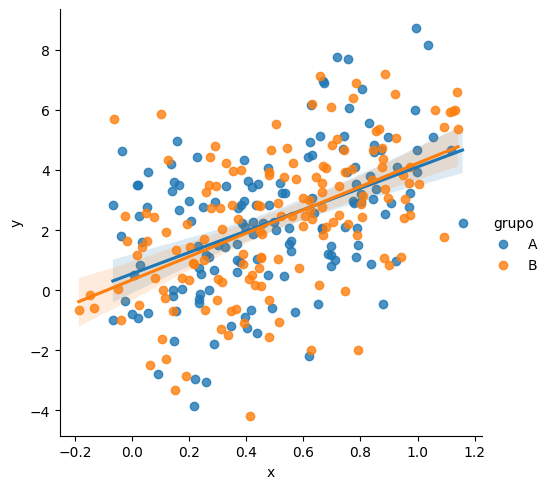

In [27]:

sns.lmplot(x = "x", y = "y",
           hue = "grupo", data = df)
plt.show()

Símbolos diferentes para cada grupo

El argumento markers permite personalizar la forma de los símbolos del gráfico, tal y como se muestra a continuación.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


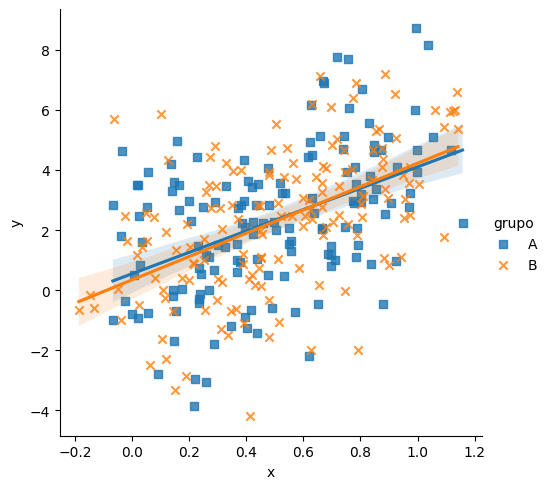

In [28]:
sns.lmplot(x = "x", y = "y",
           hue = "grupo", markers = ["s", "x"],
           data = df)
plt.show()

Paleta de colores

Ten en cuenta que puedes sobrescribir la paleta de colores por defecto con el argumento palette de la función.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


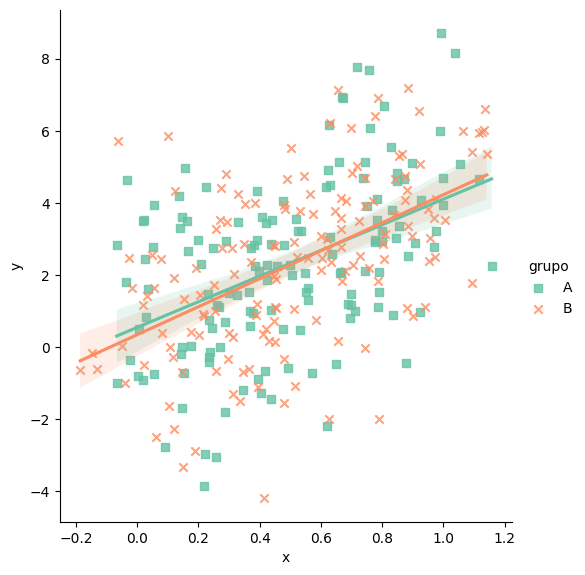

In [29]:
g = sns.lmplot(x = "x", y = "y",
           hue = "grupo", markers = ["s", "x"],
           palette = "Set2",
           data = df)
g.fig.set_size_inches(6, 6)
plt.show()

Gráfico en diferentes columnas

En los gráficos anteriores las estimaciones para ambos grupos se mostraban sobre el mismo gráfico. Si prefieres dibujar las estimaciones en varias columnas del mismo gráfico puedes pasar la variable categórica al argumento col de la función.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


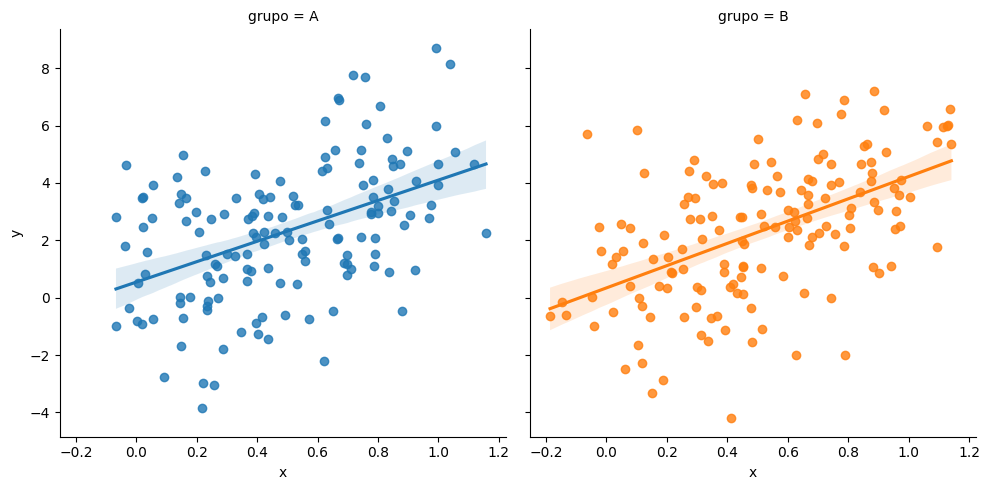

In [31]:
sns.lmplot(x = "x", y = "y",
           col = "grupo", hue = "grupo",
           data = df)
plt.show()

### Line Plot

Para hacer un gráfico line plot, usamos el método `.lineplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable que indica las posiciones de los puntos en el eje horizontal
* `y`: variable que indica las posiciones de los puntos en el eje vertical
* `sizes`: para indicar el tamaño de las líneas
* `size`: variable que divide las observaciones y produce líneas de diferentes tamaños
* `markers`: para indicar el tipo de línea
* `style`: variable que divide las observaciones y produce líneas de diferentes estilos
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce líneas de diferentes colores
* `color`: para modificar el color de todos los elementos

Vamos a usar el dataset `flights` donde vamos a representar el año, que se corresponde con la variable `year`, en el eje de horizontal y el total de pasajeros, variable `passengers`, en el eje vertical. Pero en este caso, vamos a filtrar el dataset y quedarnos solo con el mes de Enero.

In [63]:
flights_jan = flights.query("month == 'Jan'")
flights_jan.head()

,year,month,passengers
0,1949,Jan,112
12,1950,Jan,115
24,1951,Jan,145
36,1952,Jan,171
48,1953,Jan,196


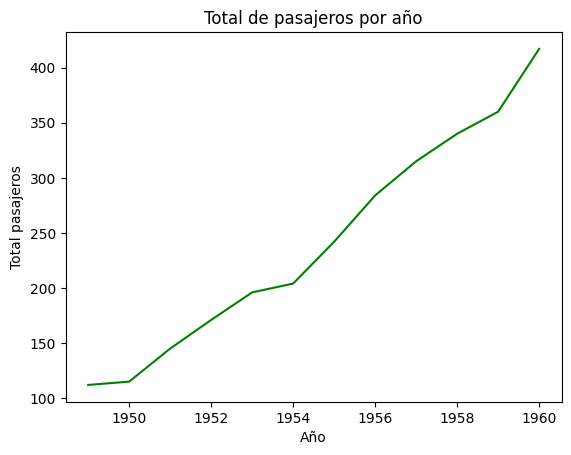

In [64]:
sns.lineplot(data = flights_jan, x = "year", y = "passengers", color = "green")
plt.title("Total de pasajeros por año")
plt.xlabel("Año")
plt.ylabel("Total pasajeros")
plt.show()

Podríamos representar un line plot para cada mes, agregando un color diferente a cada mes, del siguiente modo:

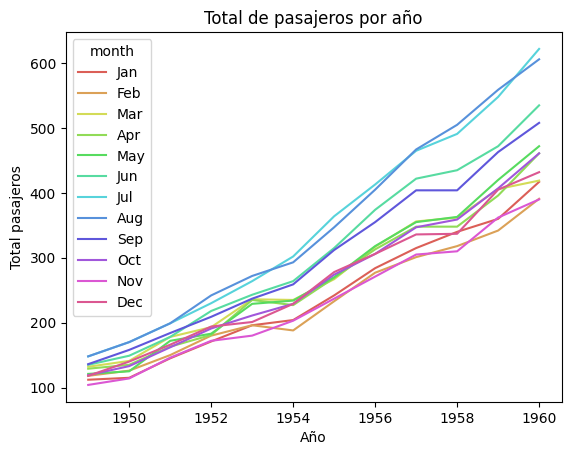

In [65]:
sns.lineplot(data = flights, x = "year", y = "passengers",
             hue = "month", palette = sns.color_palette("hls", 12))
plt.title("Total de pasajeros por año")
plt.xlabel("Año")
plt.ylabel("Total pasajeros")
plt.show()

### Bar Plot

Para hacer un gráfico de barras, usamos el método `.barplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable categórica que indica las categorías de las barras
* `y`: variable numérica que indica alturas de las barras
* `order`: para indicar el orden de las variables categóricas
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce barras de diferentes colores
* `color`: para modificar el color de todos los elementos
* `orient`: para modificar la orientación de las barras ("v": vertical, "h": horizontal)
* `ci`: tamaño del intervalo de confianza.


Vamos a usar el dataset `titanic` donde vamos a representar la clase social, que se corresponde con la variable `class`, en el eje de horizontal y el promedio pagado por pasaje, variable `fare`, en el eje vertical.

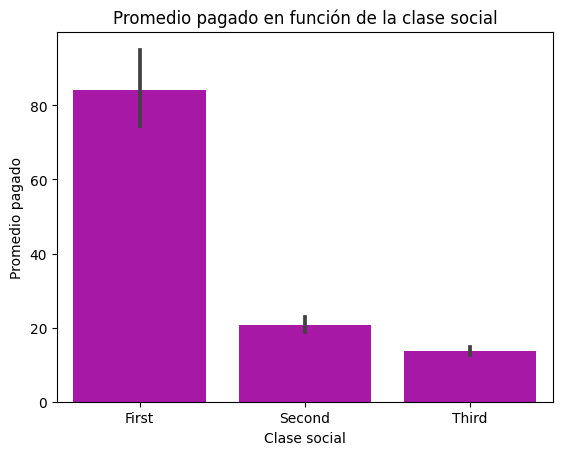

In [66]:
sns.barplot(data = titanic, x = "class", y = "fare", color = "m")
plt.title("Promedio pagado en función de la clase social")
plt.xlabel("Clase social")
plt.ylabel("Promedio pagado")
plt.show()

Podemos cambiar el orden en que las categorías son mostradas:

C:\Users\usuario\AppData\Local\Temp\ipykernel_13660\3164190133.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = titanic, x = "class", y = "fare", palette = "Spectral",


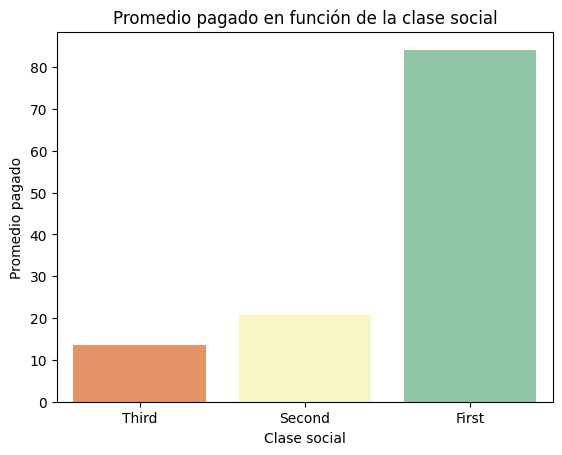

In [67]:
sns.barplot(data = titanic, x = "class", y = "fare", palette = "Spectral",
            order = ["Third", "Second", "First"], ci = None)
plt.title("Promedio pagado en función de la clase social")
plt.xlabel("Clase social")
plt.ylabel("Promedio pagado")
plt.show()

Podemos dividir cada clase en función de otra variable categórica, como por ejemplo la variable `sex`:

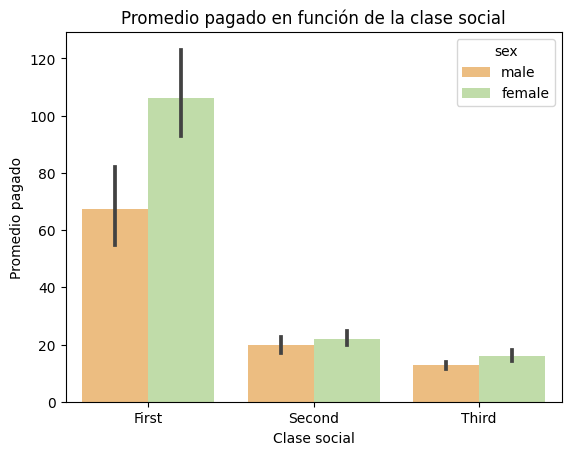

In [68]:
sns.barplot(data = titanic, x = "class", y = "fare",
            hue = "sex", palette = "Spectral")
plt.title("Promedio pagado en función de la clase social")
plt.xlabel("Clase social")
plt.ylabel("Promedio pagado")
plt.show()

Podemos representar las barras en horizontal modificando el parámetro `orient`.

**¡Cuidado!** Habrá que modificar los parámetros `x` e `y`, pues ahora `y` es la variable que necesita ser categórica.

C:\Users\usuario\AppData\Local\Temp\ipykernel_13660\3321232243.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = titanic, x = "fare", y = "class",


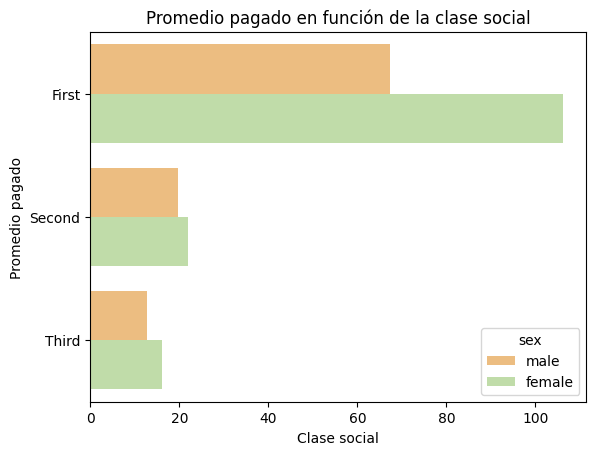

In [69]:
sns.barplot(data = titanic, x = "fare", y = "class",
            hue = "sex", palette = "Spectral",
            orient = "h", ci = None)
plt.title("Promedio pagado en función de la clase social")
plt.xlabel("Clase social")
plt.ylabel("Promedio pagado")
plt.show()

### Histogram



Para hacer un histograma, usamos el método `.histplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable que indica la posición de las observaciones en el eje horizontal
* `y`: variable que indica la posición de las observaciones en el eje vertical
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce líneas de diferentes colores
* `color`: para modificar el color de todos los elementos
* `stat`: estadístico para computar cada barra (bin)
* `bins`: número de barras o extremos de los intervalos de cada barra
* `binwidth`: para modificar la anchura de cada barra
* `binrange`: para modificar el rango de valores
* `cumulative`: booleano para indicar si se trata de un gráfico acumulativo o no
* `kde`: para añadir o no una estimador de densidad
* `multiple`: forma de mostrar múltiples elementos ("layer": por capas, "dodge": por separado, "stack": apilados, "fill": proporción)
* `element`: representación visual de la estadística del histograma ("bars": barrras, "step": escalones, "poly": polígonos)

Vamos a usar el dataset `penguins` donde vamos a representar la masa del cuerpo, que se corresponde con la variable `body_mass_g` medida en gramos, en el eje de horizontal.

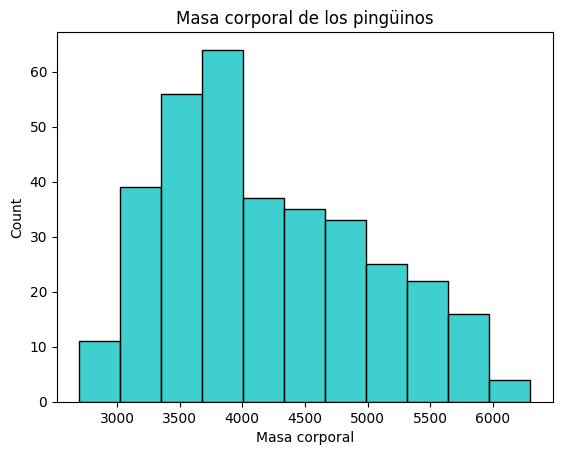

In [70]:
sns.histplot(data = penguins, x = "body_mass_g", color = "c")
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

Si quisiésemos las barras en horizontal, en vez de pasar la variable numérica al parámetro `x`, se la pasamos al parámetro `y`:

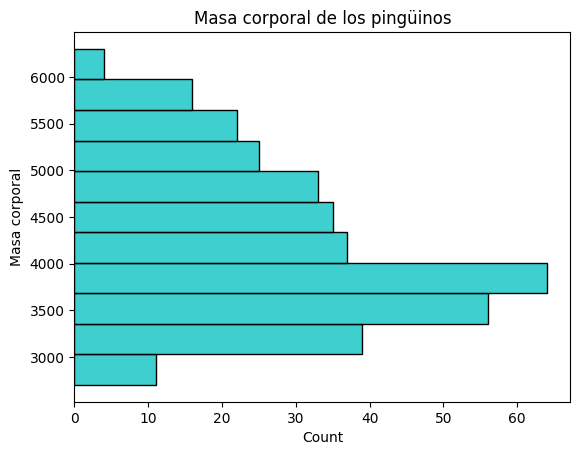

In [71]:
sns.histplot(data = penguins, y = "body_mass_g", color = "c")
plt.title("Masa corporal de los pingüinos")
plt.ylabel("Masa corporal")
plt.show()

Podemos modificar el tamaño de las barras con el parámetro `binwidth`:

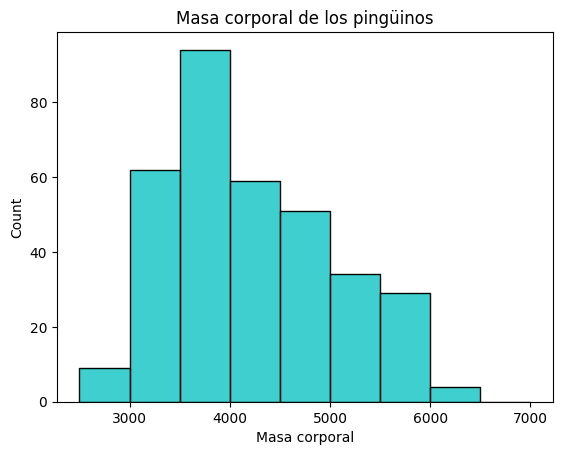

In [72]:
sns.histplot(data = penguins, x = "body_mass_g", color = "c",
             binwidth = 500, binrange = [2500, 7000])
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

Podemos añadir un estimador de densidad igualando el parámetro `kde` a `True`

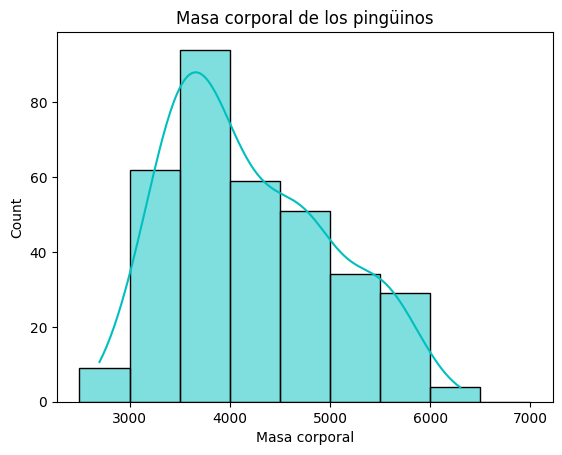

In [73]:
sns.histplot(data = penguins, x = "body_mass_g", color = "c",
             binwidth = 500, binrange = [2500, 7000], kde = True)
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

Podriamos pintar la barra en función de la especie del pingüino, que se corresponde con la variable `species` y visualizarlo de formas diferentes según los parámetros `multiple` y element:

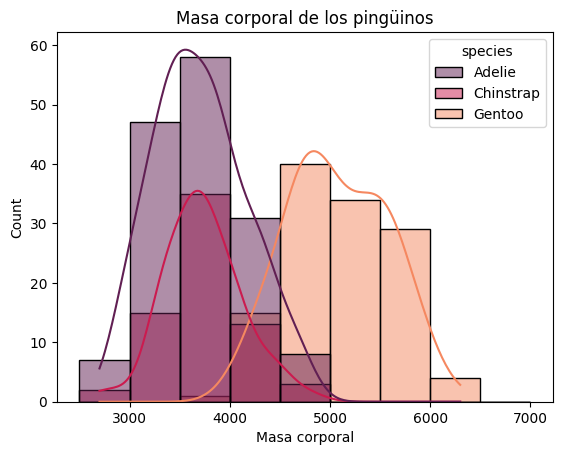

In [74]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket",
             binwidth = 500, binrange = [2500, 7000], kde = True)
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

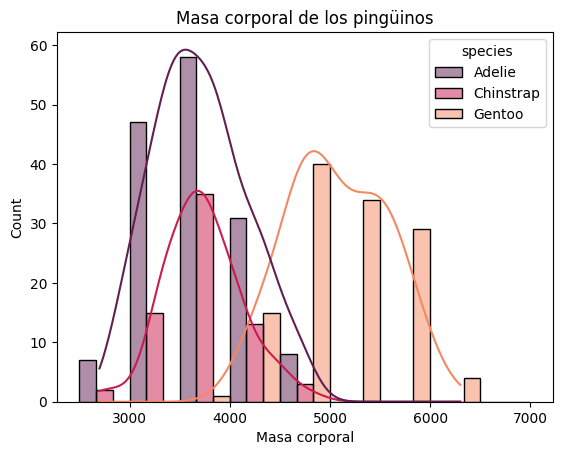

In [75]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket", multiple = "dodge",
             binwidth = 500, binrange = [2500, 7000], kde = True)
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

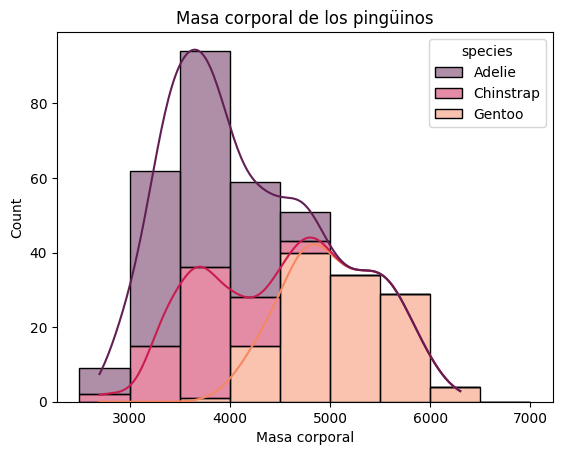

In [76]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket", multiple = "stack",
             binwidth = 500, binrange = [2500, 7000], kde = True)
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

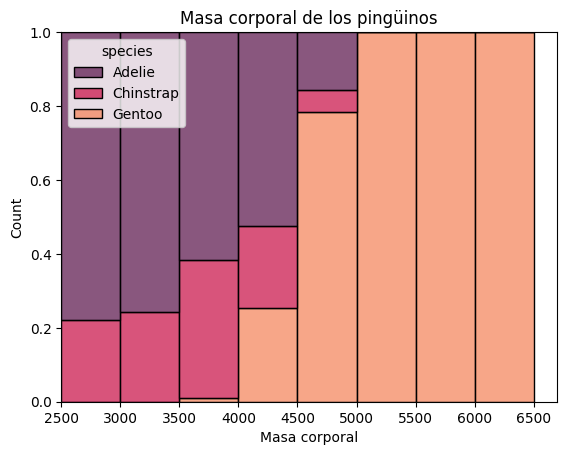

In [77]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket", multiple = "fill",
             binwidth = 500, binrange = [2500, 7000])
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

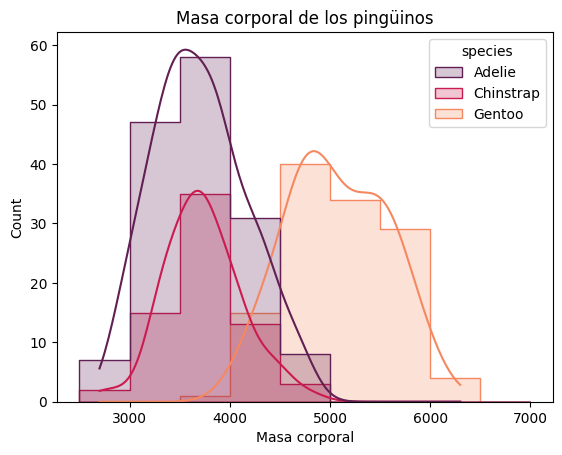

In [78]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket", element = "step",
             binwidth = 500, binrange = [2500, 7000], kde = True)
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

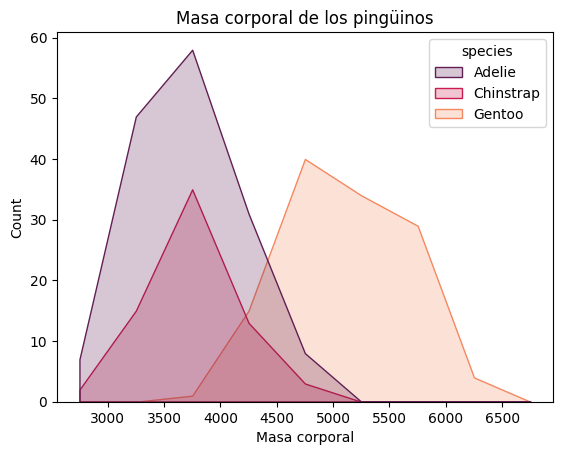

In [79]:
sns.histplot(data = penguins, x = "body_mass_g",
             hue = "species", palette = "rocket", element = "poly",
             binwidth = 500, binrange = [2500, 7000])
plt.title("Masa corporal de los pingüinos")
plt.xlabel("Masa corporal")
plt.show()

### Density Plot

Para hacer un gráfico de densidad, usamos el método `.kdeplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable que indica las posiciones de las observaciones en el eje horizontal
* `y`: variable que indica las posiciones de las observaciones en el eje vertical
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce líneas de diferentes colores
* `color`: para modificar el color de todos los elementos
* `legend`: para indicar si queremos la leyenda
* `multiple`: forma de mostrar múltiples elementos ("layer": por capas, "dodge": por separado, "stack": apilados, "fill": proporción)


Vamos a usar el dataset `titanic` donde vamos a representar la edad de los pasajeros, que se corresponde con la variable `age`, en el eje de horizontal.

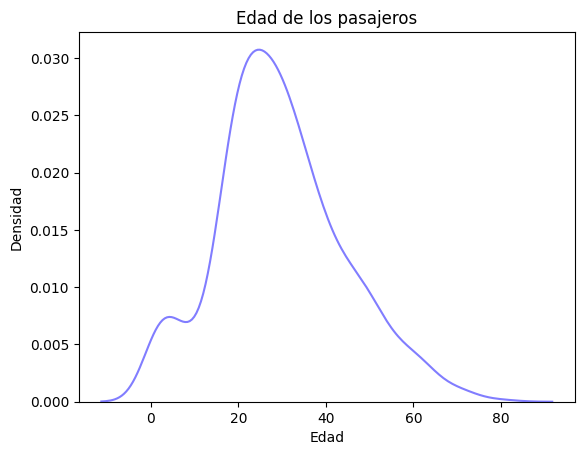

In [80]:
sns.kdeplot(data = titanic, x = "age", color = "#817dff")
plt.title("Edad de los pasajeros")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

Podemos colorear el gráfico de densidad en función de una variable categórica, por ejemplo en función de la variable `sex` y cambiar la visualización con el parámetro `multiple`:

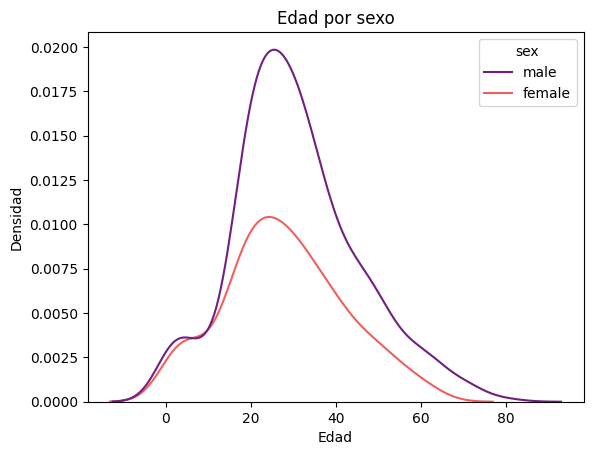

In [81]:
sns.kdeplot(data = titanic, x = "age",
            hue = "sex", palette = "magma")
plt.title("Edad por sexo")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

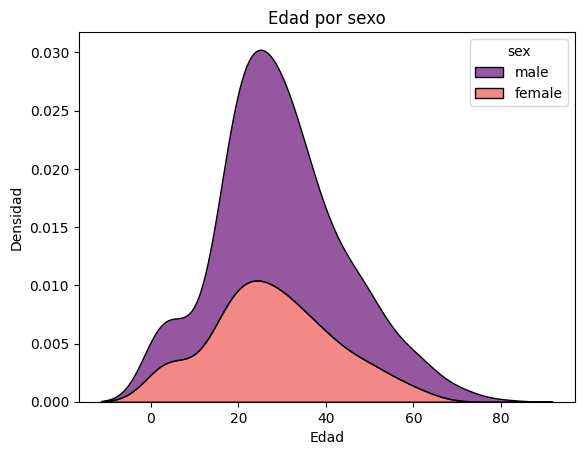

In [82]:
sns.kdeplot(data = titanic, x = "age",
            hue = "sex", palette = "magma", multiple = "stack")
plt.title("Edad por sexo")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

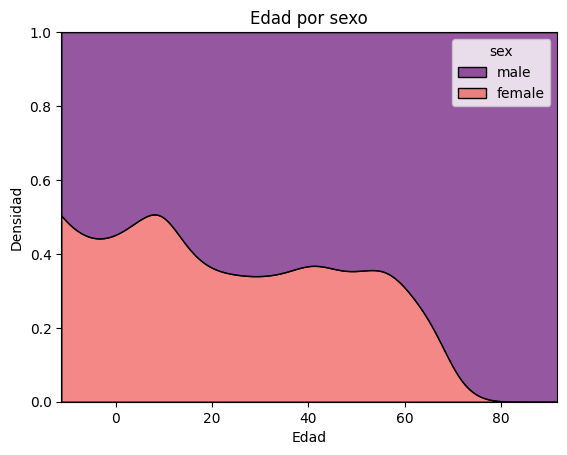

In [83]:
sns.kdeplot(data = titanic, x = "age",
            hue = "sex", palette = "magma", multiple = "fill")
plt.title("Edad por sexo")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

### Box Plot

Para hacer un gráfico de caja y bigotes, usamos el método `.boxplot()` del módulo `seaborn`.

Algunos de los parámetros de este método son:

* `data`: pd.DataFrame, np.ndarray o estructura de datos de las cuales provienenen las variables
* `x`: variable que indica las categorías
* `y`: variable numérica
* `palette`: para indicar los colores o la paleta de colores
* `hue`: variable que divide las observaciones y produce líneas de diferentes colores
* `color`: para modificar el color de todos los elementos
* `linewidth`: para modificar la anchura de las líneas
* `order`: para reordenar las categorías
* `orient`: para modificar la orientación


Vamos a usar el dataset `tips` donde vamos a representar las propinas, que se corresponde con la variable `tip`, en el eje de vertical y el día, variable `day`, en el eje horizontal.

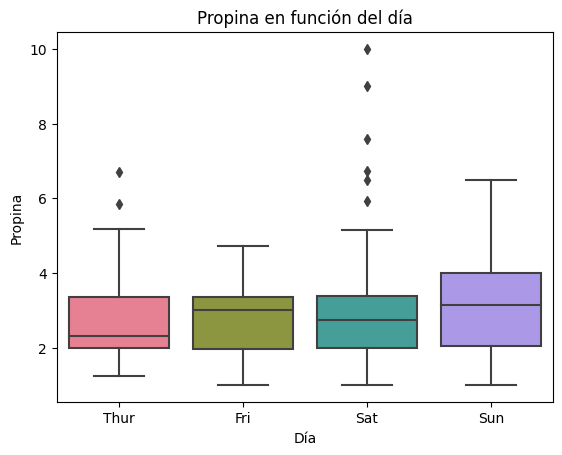

In [84]:
sns.boxplot(data = tips, x = "day", y = "tip", palette = "husl")
plt.title("Propina en función del día")
plt.xlabel("Día")
plt.ylabel("Propina")
plt.show()

Ahora, vamos a representar en un diagrama de caja y bigotes de la propina en función tiempo del día (comida o cena), que es la variable `time`, pero además diferenciando por pagador fumador y no fumador, que se corresponde a la variable `smoker`.

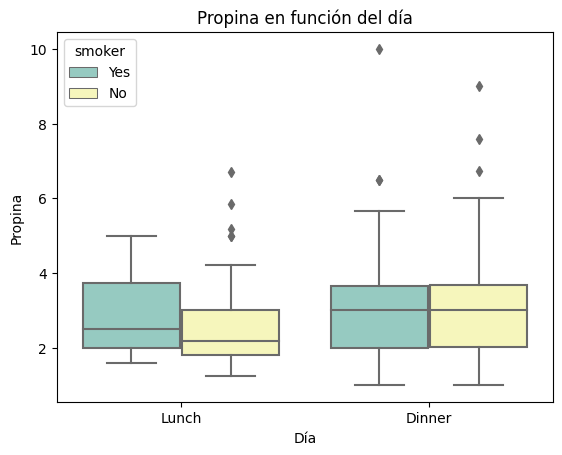

In [85]:
sns.boxplot(data = tips, x = "time", y = "tip", palette = "Set3", hue = "smoker")
plt.title("Propina en función del día")
plt.xlabel("Día")
plt.ylabel("Propina")
plt.show()

### Múltiples plots con `seaborn`

Los datos representados en este apartado proceden de los dataset `anscombe` y `dots`

In [94]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [95]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


Para poder representar múltiples plots en uno, vamos a utilizar la clase `FacetGrid`.

Tomemos el dataset `anscombe`. Podemos inicializar la rejilla de plots indicando que haya tantas casillas como categorías tenga la variable categórica `dataset` del conjunto de datos `anscombe`. Lo podemos hacer por filas, `row`, o columnas, `col`.

In [96]:
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

Si lo hacemos por fila, a `FacetGrid` hay que pasarle por parámetro el dataset que vamos a representar y al parámetro `row` pasarle la variable categórica que queramos. En este caso, dicha variable es `dataset`.

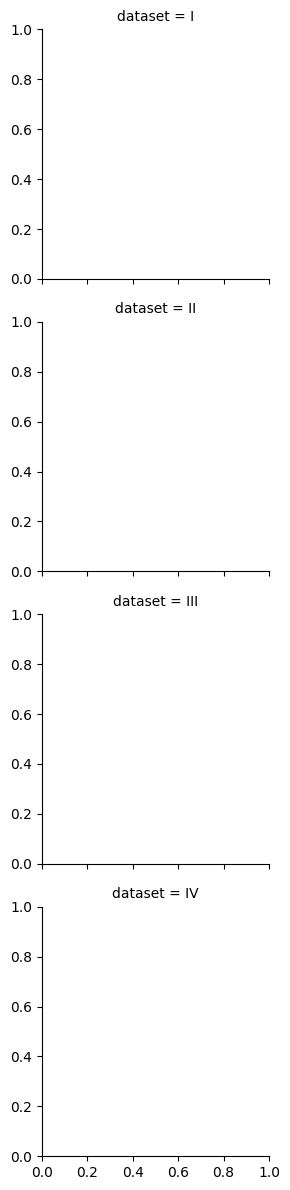

In [97]:
grid = sns.FacetGrid(anscombe, row = "dataset")

Si lo hacemos por columna, a `FacetGrid` hay que pasarle por parámetro el dataset que vamos a representar y al parámetro `col` pasarle la variable categórica que queramos. En este caso, dicha variable es `dataset`.

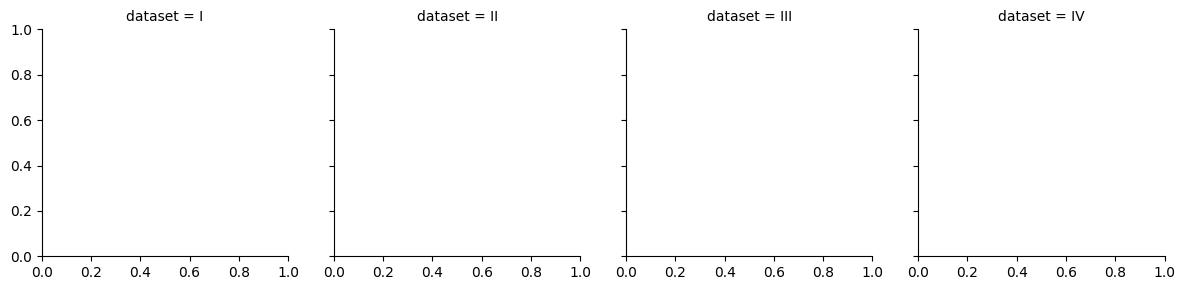

In [98]:
grid = sns.FacetGrid(anscombe, col = "dataset")

Para controlar la distribución de las casillas, disponemos de parámetros como `col_wrap`.

**¡Cuidado!** El parámetro `col_wrap` solamente puede usarse junto al parámetro `col`

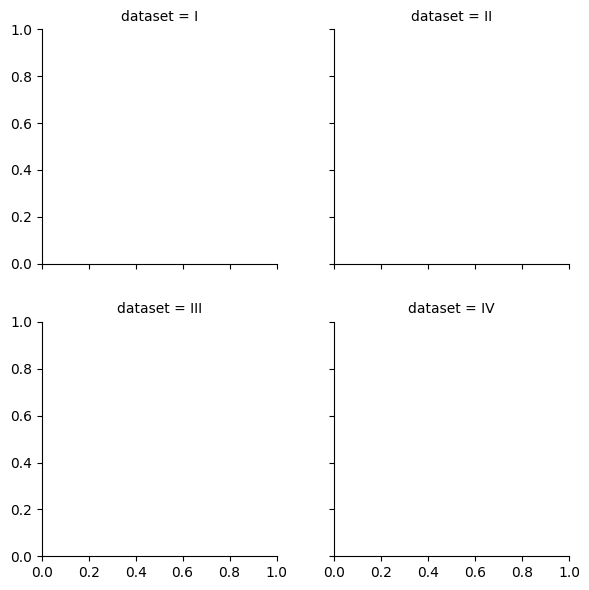

In [99]:
grid = sns.FacetGrid(anscombe, col = "dataset", col_wrap = 2)

Hasta ahora solamente hemos dibujado los ejes. Para representar gráficos en las casillas, necesitaremos el método `.map()` al que por parámetro le pasaremos el tipo de gráfico que queremos representar en todas las casillas, junto a las variables que queremos representar en los ejes

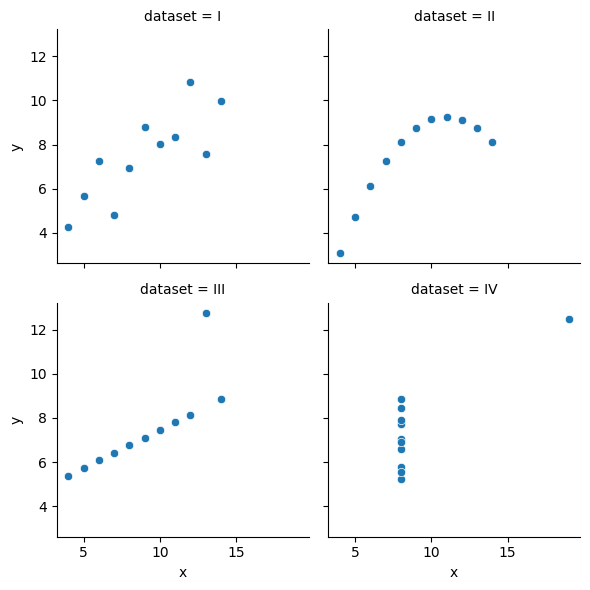

In [100]:
grid = sns.FacetGrid(anscombe, col = "dataset", col_wrap = 2)
grid.map(sns.scatterplot, "x", "y")
plt.show()

Con lo cuál hemos obtenido un scatter plot de las variables `x` e `y` de data para cada categoría de la variable `dataset`.

A la hora de inicializar la rejilla podríamos especificar el parámetro `hue` que nos pintaría de distintos colores en función de la categoría de la variable categórica que pasemos por parámetro.

Tomemos el dataset `dots`. Vamos a hacer que haya tantas casillas como categorías tenga la variable `choice` y que coloree los puntos en función de la variable categórica `align`. Representaremos la variable `firing_rate` en función de `time` con una nube de puntos.

In [101]:
dots["choice"].unique()

array(['T1', 'T2'], dtype=object)

In [102]:
dots["align"].unique()

array(['dots', 'sacc'], dtype=object)

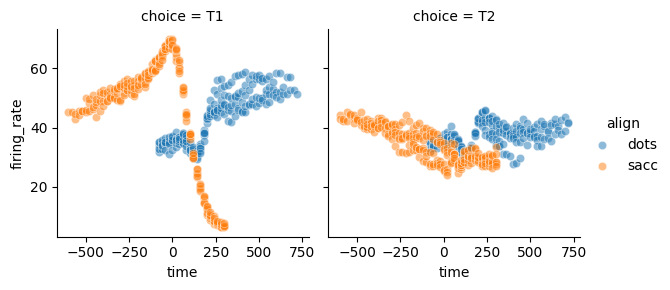

In [103]:
grid = sns.FacetGrid(dots, col = "choice", hue = "align")
grid.map(sns.scatterplot, "time", "firing_rate", alpha = .5)
grid.add_legend()
plt.show()

**Observación.** El método `.map()` tiene parámetros adicionales como por ejemplo el parámetro `alpha` para configurar la transparencia.

A la hora de inicializar la rejilla podríamos especificar una variable categórica para las filas y otra para las columnas. En este caso al parámetro `col` le pasaremos la variable `choice`; a `row`, la variable `align`; y representaremos en una nube de puntos el `firing_rate` en función del tiempo, `time`:

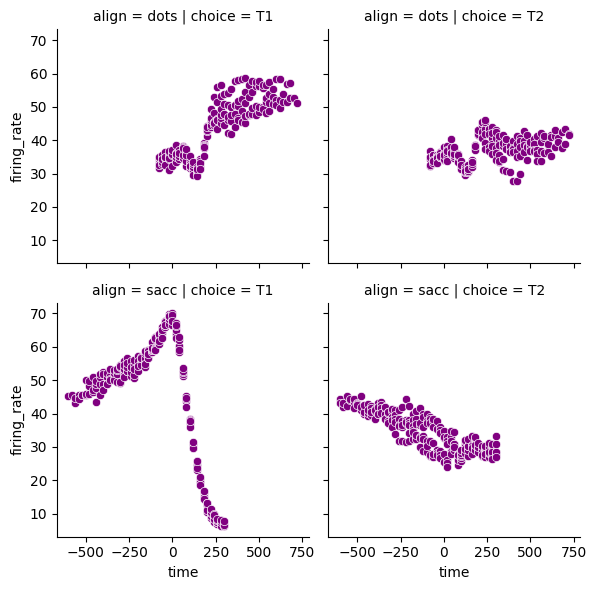

In [104]:
grid = sns.FacetGrid(dots, col = "choice", row = "align")
grid.map(sns.scatterplot, "time", "firing_rate", color = "purple")
plt.show()

**Observación.** El método `.map()` tiene parámetros adicionales como por ejemplo el parámetro `color` para modificar el color de los elementos. En este caso el color de los puntos lo hemos configurado a violeta.

Para este último caso, vemos que sobre cada subplot se nos muestran unos títulos que indican el valor que toma cada categoría en cada caso. Si en vez de mostrarlo sobre cada subplot quisiéramos mostrar qué representa cada fila y cada columna, entonces podemos usar el parámetro `margin_titles` de `FacetGrid()` e igualarlo a `True`.

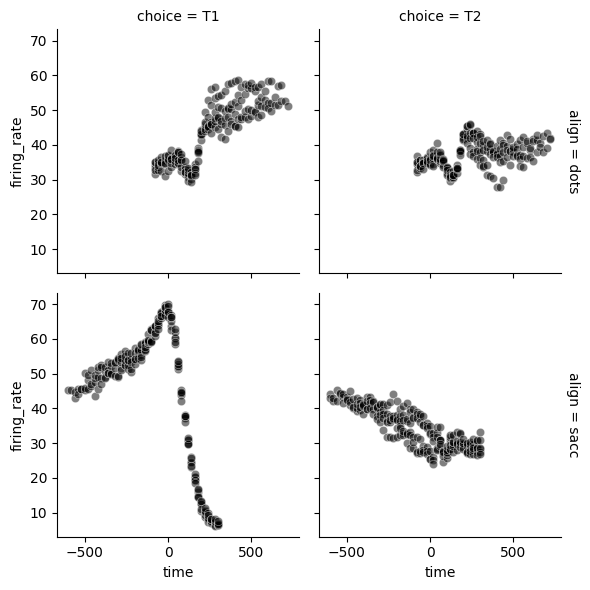

In [105]:
grid = sns.FacetGrid(dots, col = "choice", row = "align", margin_titles = True)
grid.map(sns.scatterplot, "time", "firing_rate", color = "black", alpha = .5)
plt.show()

Es posible modificar el tamaño de los subplots. Para ello hay que indicar la altura, `height`, junto al aspect ratio `aspect` a la hora de crear la rejilla con `FacetGrid()`.

Volvamos al dataset `anscombe` donde la altura de cada subplot será de 5 y la anchura será $\frac{2}{3}$ de la altura.

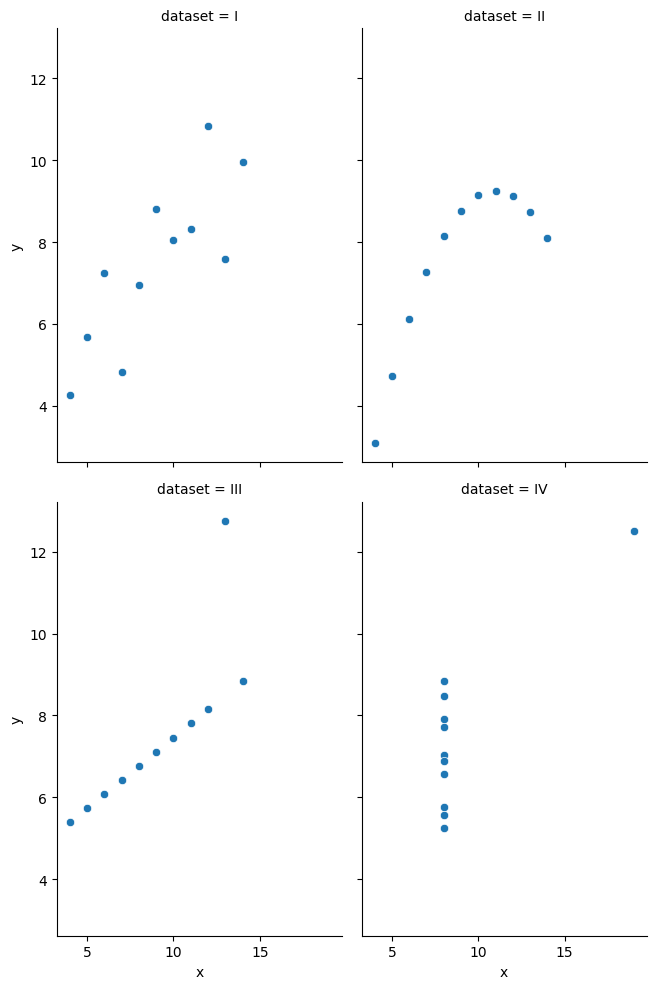

In [106]:
grid = sns.FacetGrid(anscombe, col = "dataset", col_wrap = 2,
                     height = 5, aspect = 2 / 3)
grid.map(sns.scatterplot, "x", "y")
plt.show()

GRAFICOS POR PARES

Conjunto de datos
Considera el conocido conjunto de datos iris para este tutorial, que contiene cuatro variables numéricas representando el ancho y largo de los pétalos y sépalos de diferentes plantas categorizadas por especies en una quinta variable categórica.

In [1]:
import seaborn as sns

df = sns.load_dataset("iris")

Crear y personalizar un gráfico por pares con pairplot

Pairs plot por defecto

La función pairplot de seaborn permite crear gráficos por pares en Python. Tan solo necesitas pasar tu conjunto de datos en long-format, donde cada columna es una variable y cada fila un individuo.

In [ ]:
sns.pairplot(df)

Selección de variables

Ten en cuenta que también puedes seleccionar las variables que quieras incluir en la representación con vars. En caso de que quieras incluir distintas variables para los ejes X e Y puedes utilizar los argumentos x_vars e y_bars en su lugar.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


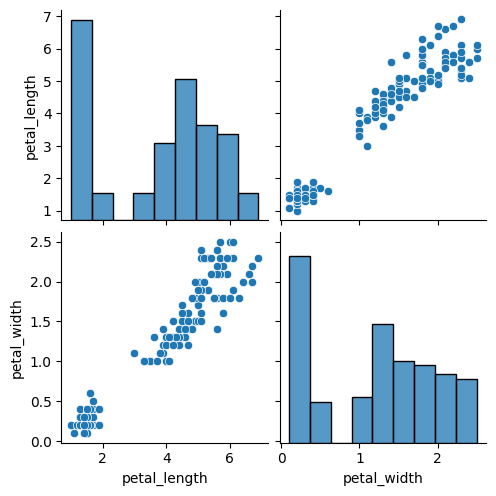

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars = ["petal_length", "petal_width"])
plt.show()

Color por grupo

Si el conjunto de datos con el que estás trabajando contiene una variable categórica que representa grupos puedes pasarla al argumento hue, de modo que las representaciones gráficas se crearán y colorearán en base a esos grupos.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


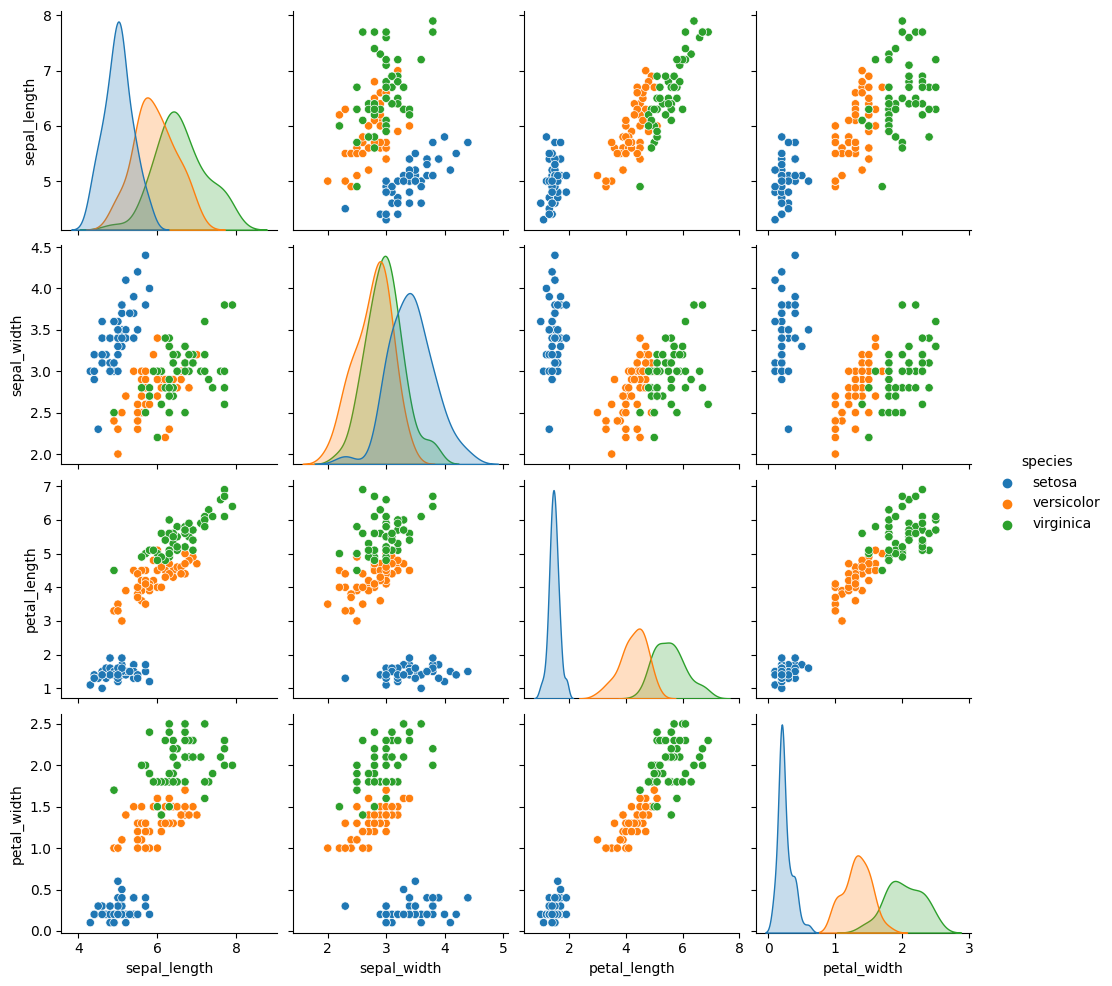

In [5]:

sns.pairplot(df, hue = "species")
plt.show()

Personalización

Los argumentos plot_kws y diag_kws se pueden utilizar para realizar una personalización más avanzada del gráfico pasando diccionarios. Mientras que el primero se usa para modificar los estilos de los gráficos de los paneles inferior y superior, el segundo permite personalizar el estilo de la diagonal.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


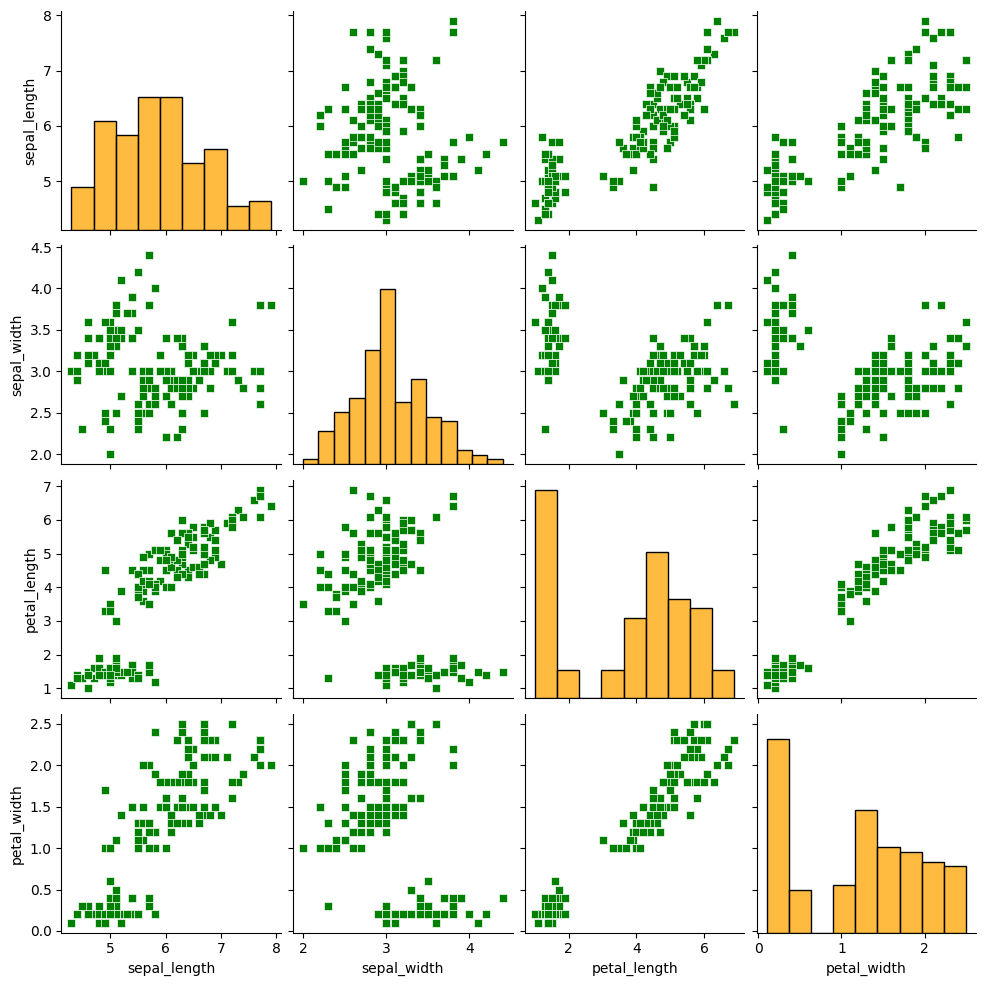

In [6]:
sns.pairplot(df,
             plot_kws = {'color': 'green', 'marker': 's'},
             diag_kws = {'color': 'orange'})
plt.show()

Símbolos personalizados para cada grupo

Ten en cuenta que puedes sobrescribir los símbolos por defecto del gráfico de dispersión con el argumento markers, tal y como se muestra a continuación. Recuerda que puedes pasar una selección de símbolos a esta función.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


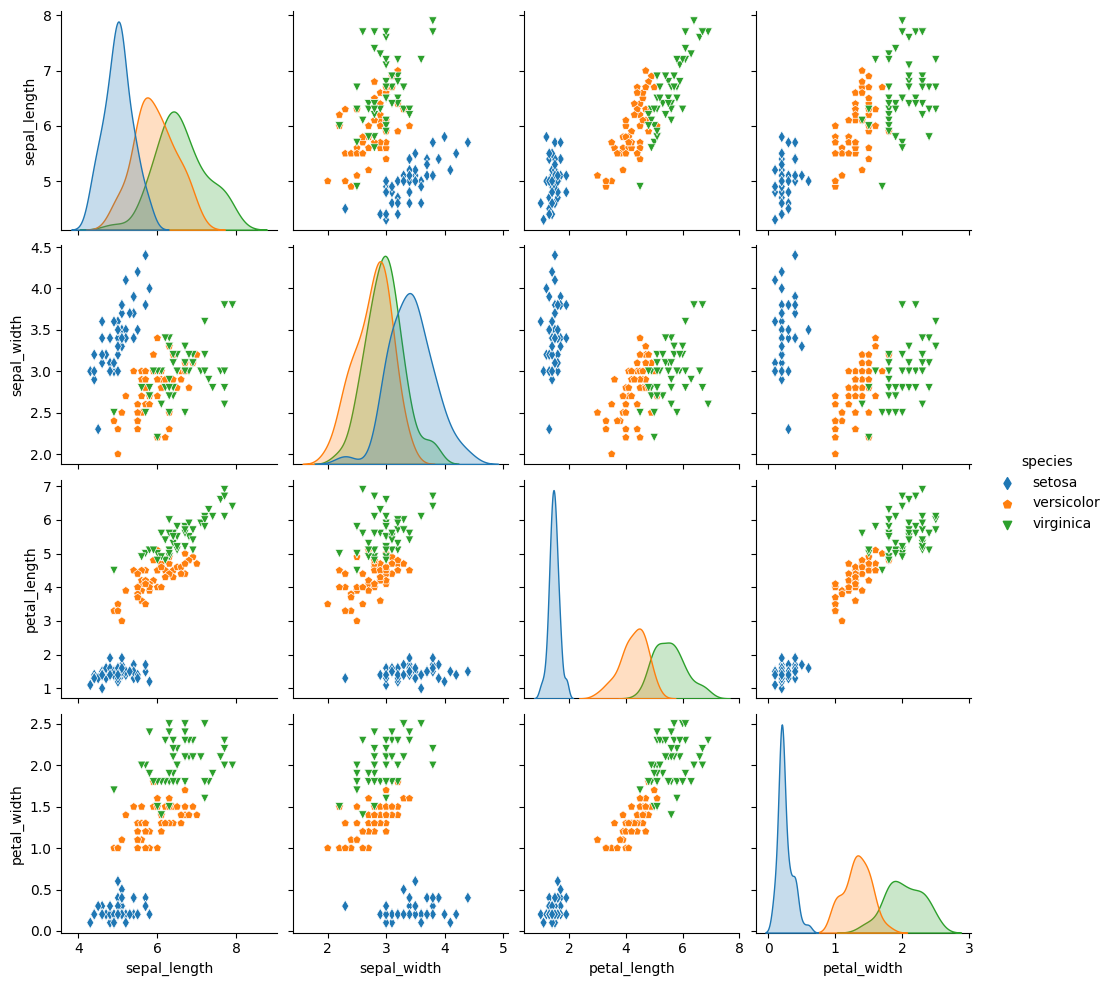

In [7]:
sns.pairplot(df, hue = "species",
             markers = ['d', 'p', 'v'])
plt.show()

Eliminar el panel superior

El argumento corner es False por defecto. Si se establece como True se creará un gráfico triangular eliminando el panel superior del gráfico.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


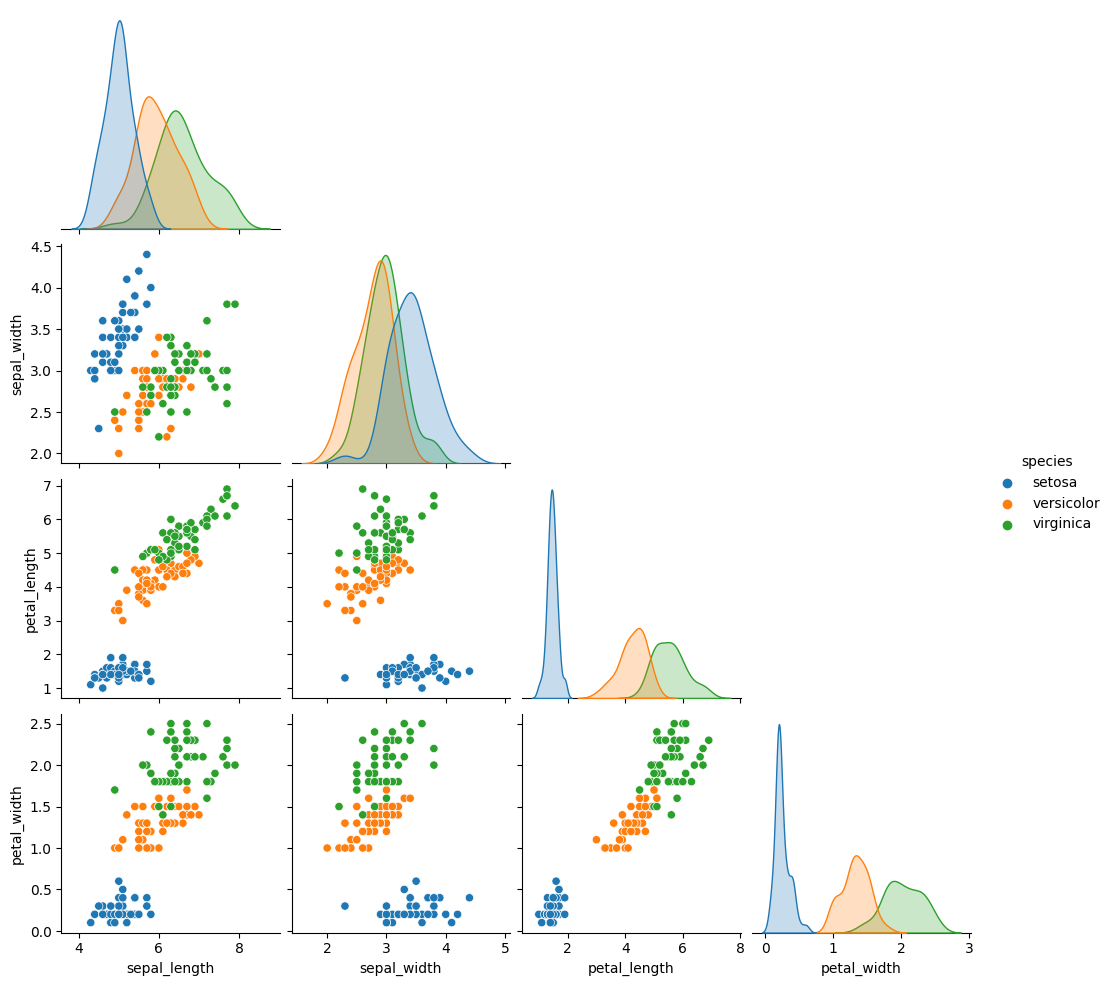

In [8]:
sns.pairplot(df, hue = "species",
             corner = True)
plt.show()

Tipos de gráficos por pares

Existen varios tipos de gráficos que se pueden crear mediante el argumento kind. Por defecto, se mostrarán gráficos de dispersión en los paneles con histogramas en la diagonal, pero también puedes seleccionar "kde" para estimaciones de densidad tipo núcleo, "hist" para histogramas e histogramas 2D y "reg" para agregar rectas de regresión sobre las nubes de puntos.

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


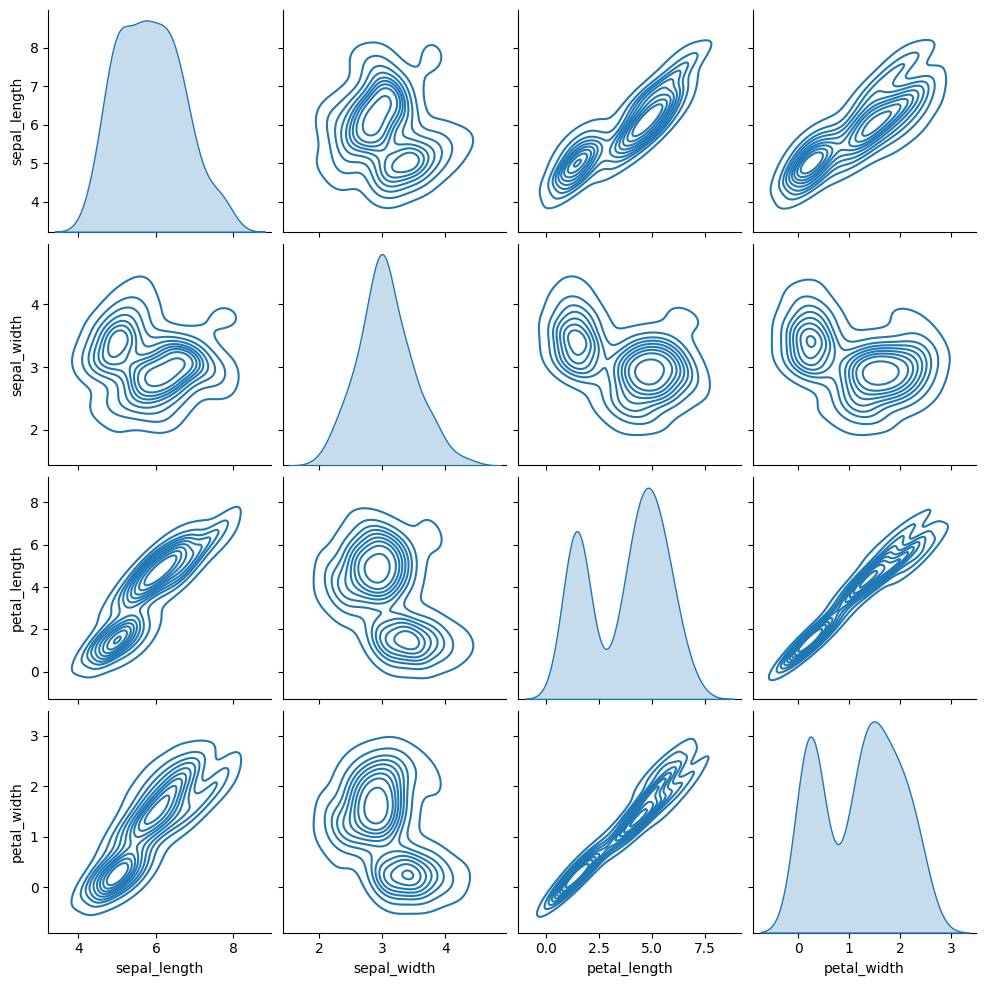

In [9]:
sns.pairplot(df, kind = "kde")
plt.show()


Histogramas 2D

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


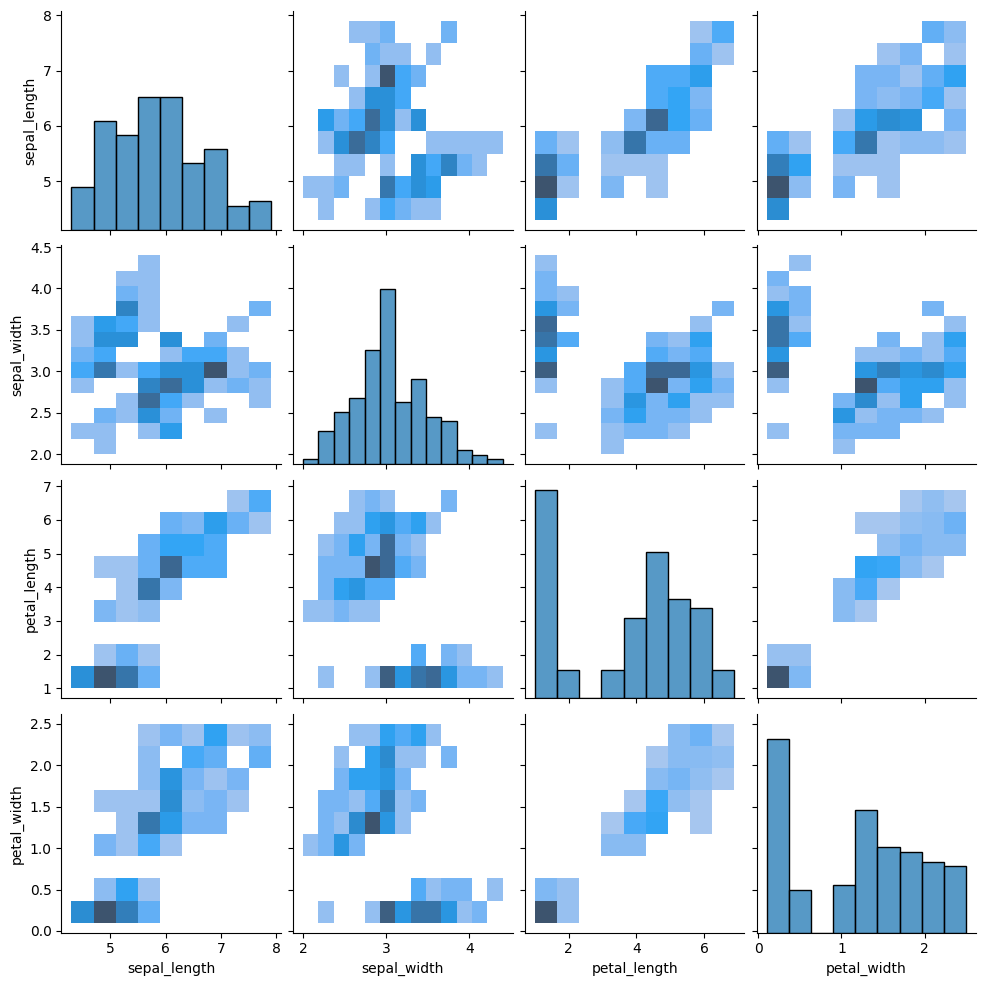

In [10]:
sns.pairplot(df, kind = "hist")
plt.show()

Regresión

c:\Python 3109\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


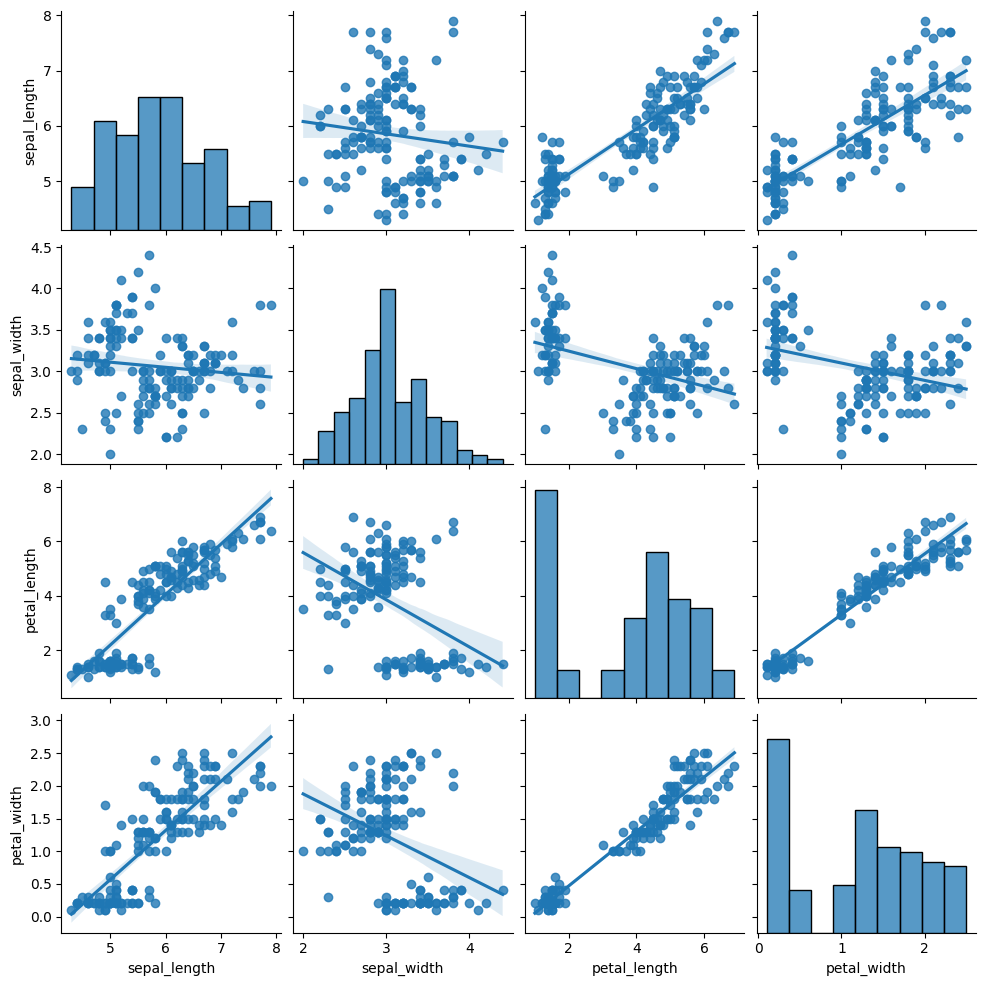

In [11]:
sns.pairplot(df, kind = "reg")
plt.show()